In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install opencv-python
import cv2

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Load and display image

(1050, 1850, 3)


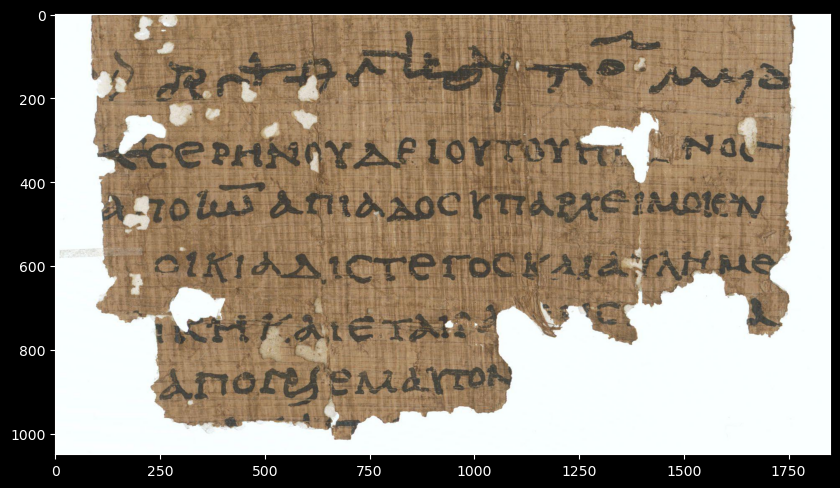

In [5]:
data_folder = 'C:/Users/Graham West/Python Notebooks/Meharry Teaching/Datasets/'

#image_path = 'Images/LakeLouise.jpg'
#image_path = 'Images/Logos.jpg'
#image_path = 'Images/Bolognese.png'
#image_path = 'Images/QuantumBookPage.jpg'
#image_path = 'Images/DiversePeople.jpg'
image_path = 'Images/P_01346_R_001.jpg'

image_path = data_folder + image_path

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# only for the papyrus fragment image
image = image[600:1650,100:1950]
#image[:,:,0] = 0
#image[:,:,1] = 0
#image[:,:,2] = 0

print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

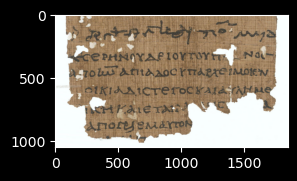

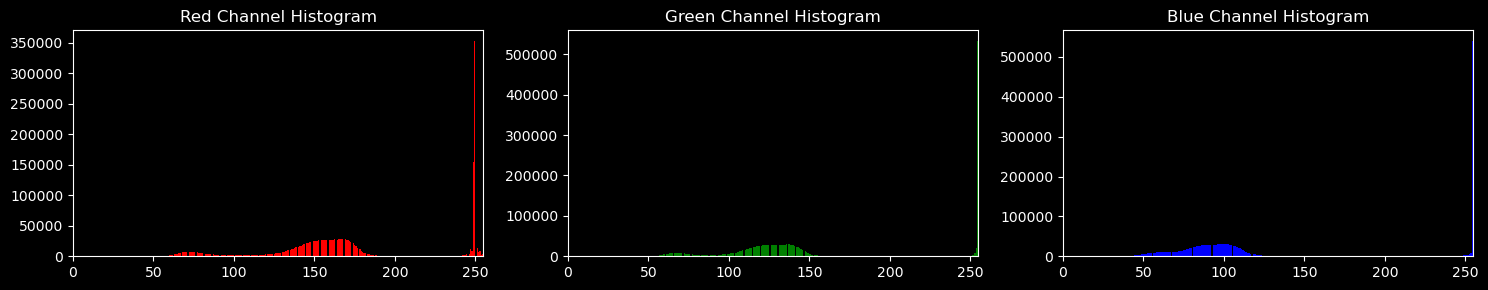

In [3]:
# Split channels
r = image[:, :, 0].flatten()
g = image[:, :, 1].flatten()
b = image[:, :, 2].flatten()

# plot image
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()

# Plot 3-column histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

axes[0].hist(r, bins=256, color='red')
axes[0].set_title('Red Channel Histogram')
axes[0].set_xlim(0, 255)

axes[1].hist(g, bins=256, color='green')
axes[1].set_title('Green Channel Histogram')
axes[1].set_xlim(0, 255)

axes[2].hist(b, bins=256, color='blue')
axes[2].set_title('Blue Channel Histogram')
axes[2].set_xlim(0, 255)

plt.tight_layout()
plt.show()

# Resize the image

(227, 400, 3)


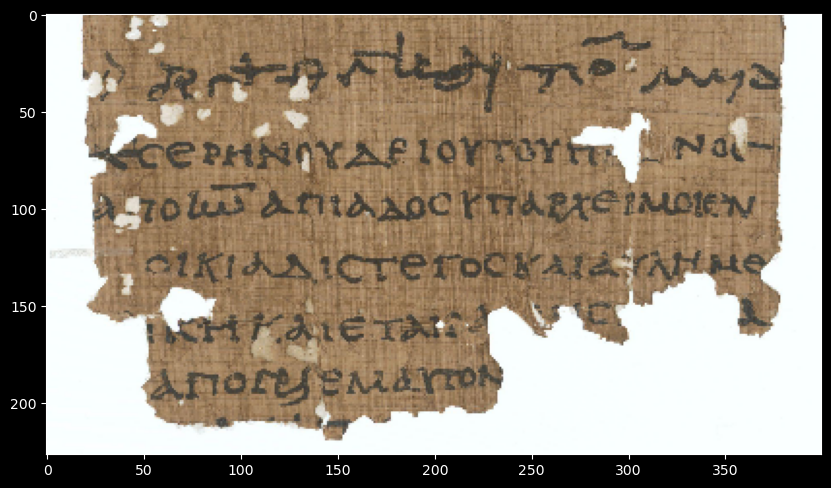

In [4]:
# Resize while preserving aspect ratio
target_width = 400
h, w = image.shape[:2]
aspect_ratio = h / w
target_height = int(target_width * aspect_ratio)

image = cv2.resize(image, (target_width, target_height))
print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

# Cluster the pixels

In [5]:
# Get shape
h, w, c = image.shape

# Reshape to (num_pixels, 3)
pixels = image.reshape(-1, 3)
pixels.shape

(90800, 3)

## K-means and GMM

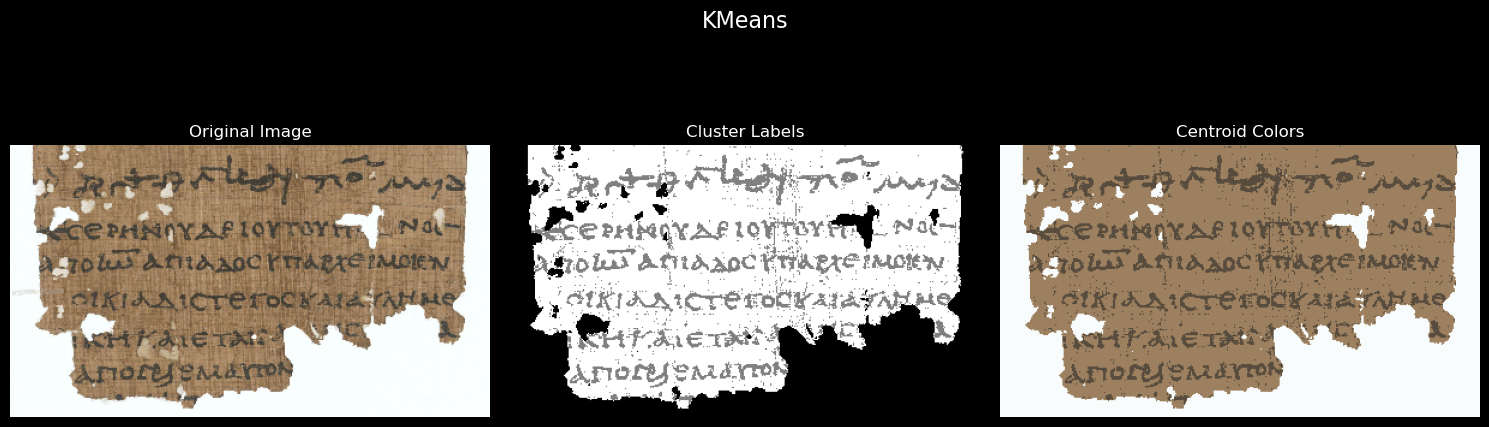

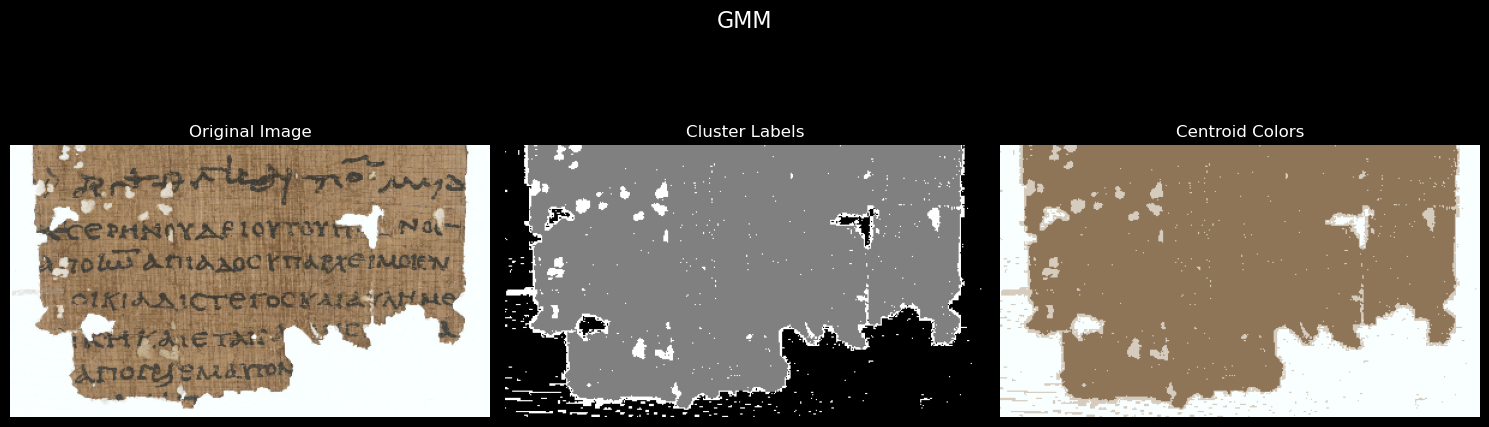

In [6]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Number of clusters
n_clusters = 3

# Prepare clustering methods
methods = []

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
k_labels = kmeans.fit_predict(pixels)
k_centers = kmeans.cluster_centers_
methods.append(('KMeans', k_labels, k_centers))

# GMM
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
g_labels = gmm.fit_predict(pixels)
g_centers = gmm.means_
methods.append(('GMM', g_labels, g_centers))

# Plot each clustering method in its own figure
for name, labels, centers in methods:
    segmented = centers[labels].astype(np.uint8).reshape((h, w, 3))
    labels_img = labels.reshape((h, w))
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(name, fontsize=16)

    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(labels_img, cmap='gray')
    axes[1].set_title('Cluster Labels')
    axes[1].axis('off')

    axes[2].imshow(segmented)
    axes[2].set_title('Centroid Colors')
    axes[2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Mean Shift

n_clusters: 2
[62441 28359]


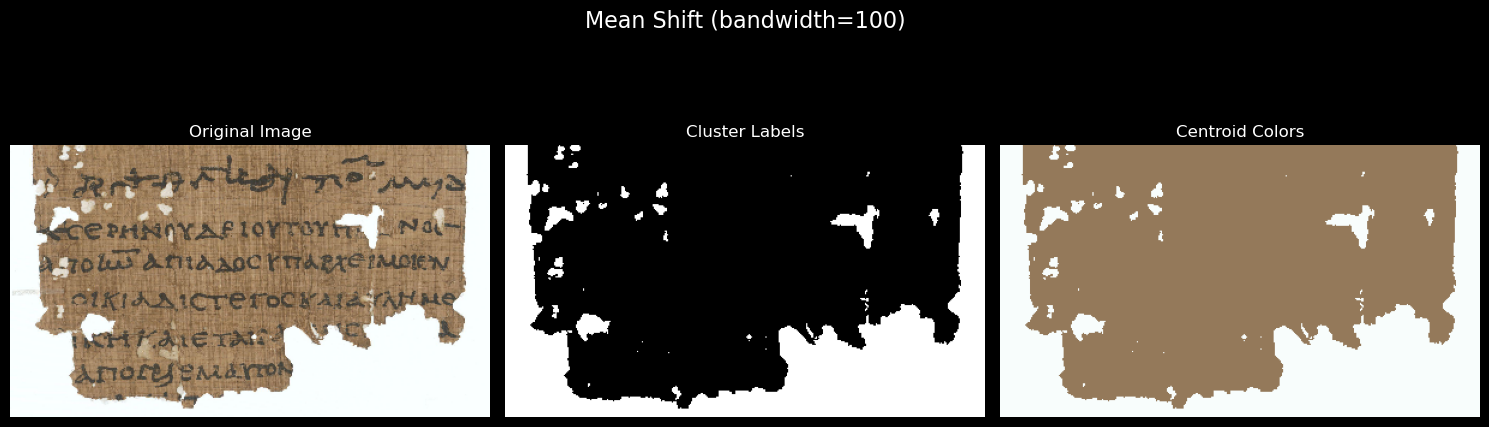

n_clusters: 2
[62491 28309]


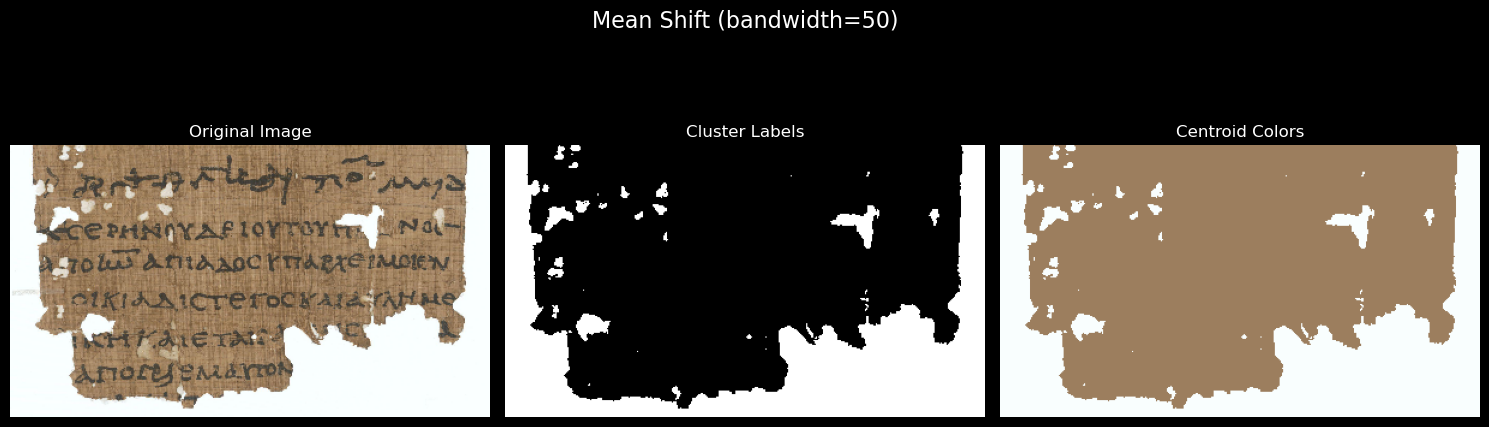

n_clusters: 4
[52066 26977 10108  1649]


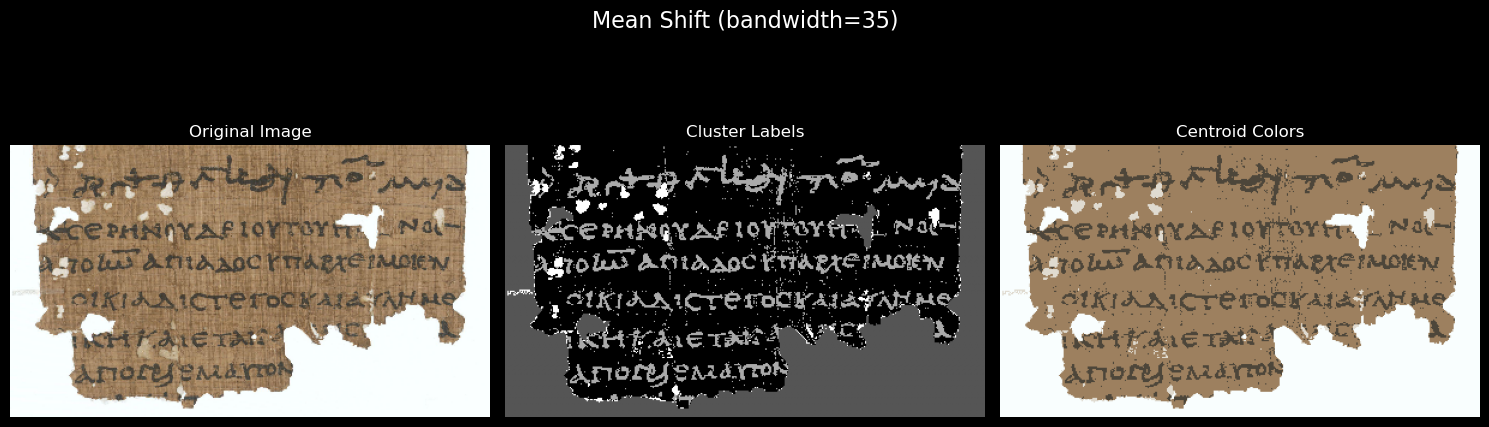

In [55]:
from sklearn.cluster import MeanShift

# Try several bandwidths
bandwidths = [100, 50, 35]

for bw in bandwidths:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    m_labels = ms.fit_predict(pixels)
    m_centers = ms.cluster_centers_

    segmented = m_centers[m_labels].astype(np.uint8).reshape((h, w, 3))
    labels_img = m_labels.reshape((h, w))

    print(f"n_clusters: {np.unique(m_labels).shape[0]}")
    print(np.bincount(m_labels))
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Mean Shift (bandwidth={bw})', fontsize=16)

    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(labels_img, cmap='gray')
    axes[1].set_title('Cluster Labels')
    axes[1].axis('off')

    axes[2].imshow(segmented)
    axes[2].set_title('Centroid Colors')
    axes[2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()